## Introduction to Machine Learning

Machine learning (ML) is a subset of artificial intelligence (AI) that enables systems to learn from data, improve their performance over time, and make predictions or decisions without being explicitly programmed.

- In traditional ML, we often deal with general datasets like images, text, or tabular data. 

- However, in **geospatial ML**, the data comes from remote sensing sources such as satellite imagery, UAV data, and aerial photographs.

- These data types come with unique characteristics, such as spatial dependencies, high dimensionality, and geographic context.

Let's explore the core concepts of ML that are used both in traditional and geospatial ML applications.


In [47]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Set up some basic visualizations
sns.set(style="whitegrid")


### 1. Core ML Concepts

#### 1.1 Training and Testing

In ML, we split the dataset into two parts:
- **Training data**: Used to train the model, allowing it to learn the underlying patterns.
- **Testing data**: Used to evaluate the model's performance on unseen data.

The goal is to build a model that generalizes well, meaning it performs well on both the training and testing datasets.

We'll now generate a simple dataset for classification and split it into training and testing sets.


In [48]:
# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing data
X_train.shape, X_test.shape


((800, 20), (200, 20))

#### 1.2 Validation Techniques

To evaluate how well the model generalizes, we use **cross-validation**, which divides the training set into smaller subsets (folds) and trains the model multiple times on different combinations of folds.

This helps prevent overfitting and gives a better estimate of model performance.

We will use cross-validation on our synthetic dataset to check the performance of a logistic regression model.


In [49]:
# Initialize a logistic regression model
model = LogisticRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Display the cross-validation scores
cv_scores, np.mean(cv_scores)


(array([0.85625, 0.875  , 0.85625, 0.86875, 0.88125]), 0.8674999999999999)

#### 1.3 Types of Models: Regression and Classification

ML models can be broadly categorized into:
- **Classification**: Predicting a categorical label. Example: Identifying land cover types from satellite imagery.
- **Regression**: Predicting a continuous value. Example: Estimating temperature or rainfall from remote sensing data.

Let's implement both a classification and regression model.


In [51]:
# Classification model: Logistic Regression
classification_model = LogisticRegression()
classification_model.fit(X_train, y_train)
classification_predictions = classification_model.predict(X_test)

# Evaluate classification model
classification_accuracy = np.mean(classification_predictions == y_test)
print(f'Class. acc. : {classification_accuracy}')

# Regression model: Linear Regression
X_reg, y_reg = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

regression_model = LinearRegression()
regression_model.fit(X_train_reg, y_train_reg)
regression_predictions = regression_model.predict(X_test_reg)

# Evaluate regression model
mse = mean_squared_error(y_test_reg, regression_predictions)
mse
print(f'Regression. mean sq. error. : {mse}')


Class. acc. : 0.855
Regression. mean sq. error. : 0.011427751339306132


### 2. Overfitting and How to Address It

**Overfitting** occurs when a model learns the noise or random fluctuations in the training data rather than the underlying pattern. It performs well on training data but poorly on testing data because it doesn't generalize well.

### Ways to Address Overfitting:
- **Cross-validation**: As we saw earlier, cross-validation helps evaluate model performance on multiple subsets of the training data.
- **Regularization**: Adding a penalty to the model for overly complex solutions (e.g., L1 or L2 regularization in regression).
- **Data augmentation**: In geospatial applications, augmenting data with transformations can help improve model generalization.
- **Simpler models**: Avoid overly complex models that might overfit the data.

We'll now visualize a model's performance on both training and test data to illustrate overfitting.


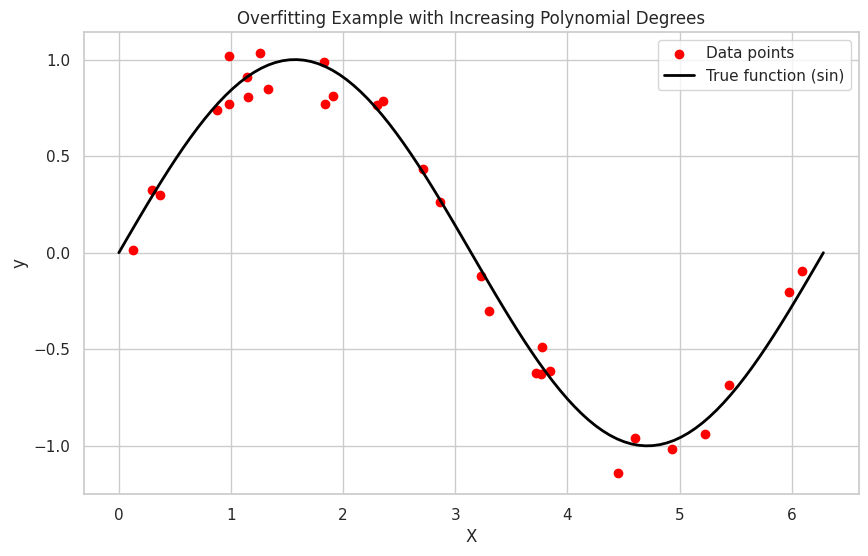

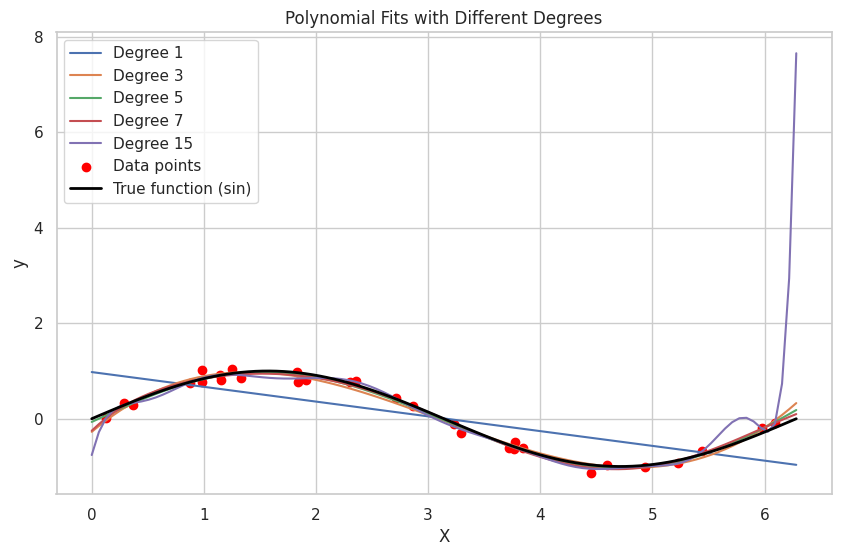

Degree 1:
  Training Error (MSE): 0.2084
  Test Error (MSE): 0.2039

Degree 3:
  Training Error (MSE): 0.0093
  Test Error (MSE): 0.0072

Degree 5:
  Training Error (MSE): 0.0071
  Test Error (MSE): 0.0021

Degree 7:
  Training Error (MSE): 0.0065
  Test Error (MSE): 0.0032

Degree 15:
  Training Error (MSE): 0.0047
  Test Error (MSE): 0.7049



In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate simple data: a sine wave
np.random.seed(42)
X = np.sort(np.random.rand(30, 1) * 2 * np.pi, axis=0)  # 30 points between 0 and 2*pi
y = np.sin(X).ravel() + 0.1 * np.random.randn(30)  # Sine wave with noise

# Create a test set for evaluation
X_test = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
y_test = np.sin(X_test).ravel()

# Plot the original data and the true function
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Data points')
plt.plot(X_test, y_test, color='black', label='True function (sin)', linewidth=2)
plt.title('Overfitting Example with Increasing Polynomial Degrees')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Fit polynomials of varying degrees
degrees = [1, 3, 5, 7, 15]
train_errors = []
test_errors = []

plt.figure(figsize=(10, 6))

for degree in degrees:
    # Transform data to polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    X_test_poly = poly.transform(X_test)
    
    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Predictions on training and test data
    y_train_pred = model.predict(X_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate the mean squared errors
    train_errors.append(mean_squared_error(y, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))
    
    # Plot the fit
    plt.plot(X_test, y_test_pred, label=f'Degree {degree}')

plt.scatter(X, y, color='red', label='Data points')
plt.plot(X_test, y_test, color='black', label='True function (sin)', linewidth=2)
plt.title('Polynomial Fits with Different Degrees')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Print training and test errors for each degree
for degree, train_error, test_error in zip(degrees, train_errors, test_errors):
    print(f"Degree {degree}:")
    print(f"  Training Error (MSE): {train_error:.4f}")
    print(f"  Test Error (MSE): {test_error:.4f}\n")


### 3. Geospatial Machine Learning vs Traditional ML

**Geospatial ML** deals with spatially correlated data that has inherent geographic properties. This includes satellite images, remote sensing data, and spatial datasets that have both location and context.

Key differences:
- **Spatial dependence**: Nearby data points often share similar values, which violates the independence assumption in traditional ML.
- **High dimensionality**: Geospatial data (e.g., satellite images) often have many bands (spectral channels), leading to a high-dimensional feature space.
- **Geospatial features**: In addition to traditional features (e.g., age, income), geospatial data may include spatial features like latitude, longitude, elevation, and temporal aspects.

We'll now look at how we handle spatial data in ML. Let’s visualize a sample remote sensing image and apply a simple classification model.


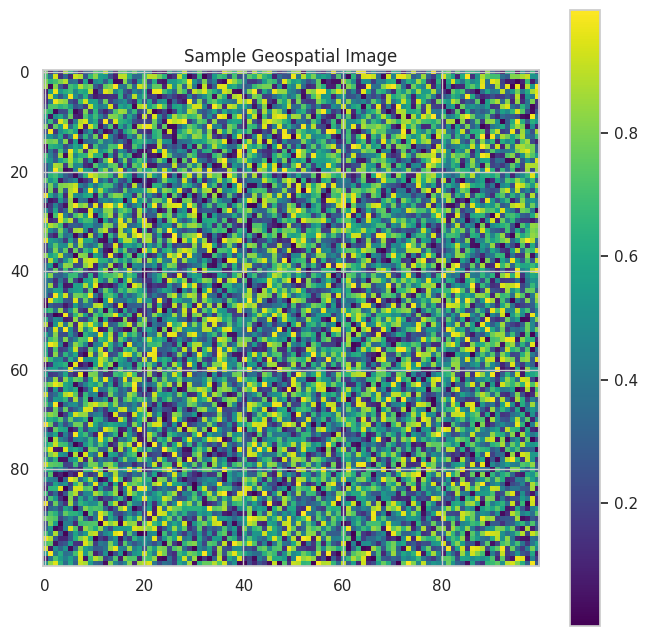

0.5035

In [53]:
# Example using a simulated image (2D array and binary labels)
image = np.random.rand(100, 100)  # Simulated remote sensing image (100x100 pixels)

plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='viridis')
plt.title("Sample Geospatial Image")
plt.colorbar()
plt.show()

# Example of a simple classification problem in a geospatial context
# Pretend each pixel represents a feature vector, and we will classify them into two categories
X_geospatial = np.random.rand(10000, 5)  # 10000 pixels, 5 features per pixel
y_geospatial = np.random.randint(2, size=10000)  # Binary classification (e.g., land cover)

# Split the data
X_train_geo, X_test_geo, y_train_geo, y_test_geo = train_test_split(X_geospatial, y_geospatial, test_size=0.2, random_state=42)

# Train a classifier
geospatial_model = LogisticRegression()
geospatial_model.fit(X_train_geo, y_train_geo)

# Predict and evaluate
geospatial_predictions = geospatial_model.predict(X_test_geo)
geospatial_accuracy = np.mean(geospatial_predictions == y_test_geo)
geospatial_accuracy


In [54]:
# Example with real data
from PIL import Image
image = Image.open('example_data/img.png')
mask = Image.open('example_data/mask.jpg')

image.show()
mask.show()

X_geospatial = np.array(image)[0:40, 0:40, :].reshape(-1, 4)
y_geospatial = np.array(mask)[0:40, 0:40, 0].flatten()

print(X_geospatial.shape)
print(y_geospatial.shape)

(1600, 4)
(1600,)


In [55]:
# Split the data
X_train_geo, X_test_geo, y_train_geo, y_test_geo = train_test_split(X_geospatial, y_geospatial, test_size=0.2, random_state=42)

# Train a classifier
geospatial_model = LogisticRegression()
geospatial_model.fit(X_train_geo, y_train_geo)

# Predict and evaluate
geospatial_predictions = geospatial_model.predict(X_test_geo)
geospatial_accuracy = np.mean(geospatial_predictions == y_test_geo)
geospatial_accuracy


/home/gurayerus/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.659375

### 4. Practical Application in Remote Sensing (RS)

```markdown
## Practical Application in Remote Sensing (RS)

Machine learning in remote sensing can be applied to various tasks, such as:
- **Land Cover Classification**: Classifying different types of land cover (e.g., water, forest, urban) using satellite imagery.
- **Change Detection**: Identifying changes in the landscape over time (e.g., deforestation or urban expansion).
- **Object Detection**: Detecting specific objects such as buildings, roads, or vehicles from aerial imagery.

Let's now summarize the key concepts covered in this notebook and the application of these techniques to remote sensing data.
```

### Conclusion

We’ve covered the fundamentals of machine learning, focusing on core concepts like training, testing, validation, types of models, overfitting, and how these principles apply to geospatial machine learning. 

Remote sensing data adds complexity but also offers unique opportunities for machine learning applications, especially when working with spatial data.

For practical use, machine learning can be applied to land cover classification, object detection, and time series analysis of remote sensing data. 

Understanding how traditional ML methods can be adapted to handle geospatial data is key to success in this field.
